<a href="https://colab.research.google.com/github/robsub/Tensorflow_Daniel_Bourke/blob/main/00_tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is TensorFlow?
TensorFlow is an open-source end-to-end machine learning library for preprocessing data, modelling data and serving models (getting them into the hands of others).

# Why use TensorFlow?
Rather than building machine learning and deep learning models from scratch, it's more likely you'll use a library such as TensorFlow. This is because it contains many of the most common machine learning functions you'll want to use.

# What we're going to cover
TensorFlow is vast. But the main premise is simple: turn data into numbers (tensors) and build machine learning algorithms to find patterns in them.

In this notebook we cover some of the most fundamental TensorFlow operations, more specifically:

- Introduction to tensors (creating tensors)
- Getting information from tensors (tensor attributes)
- Manipulating tensors (tensor operations)
- Tensors and NumPy
- Using @tf.function (a way to speed up your regular Python functions)
- Using GPUs with TensorFlow
- Exercises to try

## Things to note:

Many of the conventions here will happen automatically behind the scenes (when you build a model) but it's worth knowing so if you see any of these things, you know what's happening.
For any TensorFlow function you see, it's important to be able to check it out in the documentation, for example, going to the Python API docs for all functions and searching for what you need: https://www.tensorflow.org/api_docs/python/ (don't worry if this seems overwhelming at first, with enough practice, you'll get used to navigating the documentaiton).
Introduction to Tensors
If you've ever used NumPy, tensors are kind of like NumPy arrays (we'll see more on this later).

For the sake of this notebook and going forward, you can think of a tensor as a multi-dimensional numerical representation (also referred to as n-dimensional, where n can be any number) of something. Where something can be almost anything you can imagine:

It could be numbers themselves (using tensors to represent the price of houses).
It could be an image (using tensors to represent the pixels of an image).
It could be text (using tensors to represent words).
Or it could be some other form of information (or data) you want to represent with numbers.
The main difference between tensors and NumPy arrays (also an n-dimensional array of numbers) is that tensors can be used on GPUs (graphical processing units) and TPUs (tensor processing units).

The benefit of being able to run on GPUs and TPUs is faster computation, this means, if we wanted to find patterns in the numerical representations of our data, we can generally find them faster using GPUs and TPUs.

Okay, we've been talking enough about tensors, let's see them.

The first thing we'll do is import TensorFlow under the common alias tf.

In [1]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.11.0



# Creating Tensors with tf.constant()
As mentioned before, in general, you usually won't create tensors yourself. This is because TensorFlow has modules built-in (such as tf.io and tf.data) which are able to read your data sources and automatically convert them to tensors and then later on, neural network models will process these for us.

But for now, because we're getting familar with tensors themselves and how to manipulate them, we'll see how we can create them ourselves.

We'll begin by using tf.constant()


A scalar is known as a rank 0 tensor. Because it has no dimensions (it's just a number).

🔑 Note: For now, you don't need to know too much about the different ranks of tensors (but we will see more on this later). The important point is knowing tensors can have an unlimited range of dimensions (the exact amount will depend on what data you're representing).

In [18]:
# Create a scalar (rank 0 tensor)
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [13]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [22]:
# Create a matrix (more than 1 dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [25]:
matrix.ndim

2

In [24]:
matrix.shape

TensorShape([2, 2])

In [27]:
scalarROB = tf.constant([[10, 7],
                      [7, 10]])

In [28]:
scalarROB.ndim

2

In [29]:
scalarROB.shape

TensorShape([2, 2])

In [30]:
# Create a vector (more than 0 dimensions)
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [31]:
vector.ndim

1

In [32]:
# Create a matrix (more than 1 dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [33]:
matrix.ndim

2

In [37]:
matrixROB = tf.constant([[10, 7, 999],
                      [7, 10, 999]])
matrixROB

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 10,   7, 999],
       [  7,  10, 999]], dtype=int32)>

In [38]:
matrix.ndim

2

In [40]:
matrixROB.ndim


2

In [41]:
matrixROB.shape

TensorShape([2, 3])

In [45]:
# Create another matrix and define the datatype
another_matrix = tf.constant([[10., 7.],
                              [3., 2.987698687],
                              [8., 9.]], dtype=tf.float16) # specify the datatype with 'dtype'
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.   ,  7.   ],
       [ 3.   ,  2.988],
       [ 8.   ,  9.   ]], dtype=float16)>

In [46]:
# Even though another_matrix contains more numbers, its dimensions stay the same
another_matrix.ndim

2

In [47]:
another_matrix.shape

TensorShape([3, 2])

In [52]:
# How about a tensor? (more than 2 dimensions, although, all of the above items are also technically tensors)
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

3

In [50]:
tensor.shape

TensorShape([3, 2, 3])


This is known as a rank 3 tensor (3-dimensions), however a tensor can have an arbitrary (unlimited) amount of dimensions.

For example, you might turn a series of images into tensors with shape (224, 224, 3, 32), where:

224, 224 (the first 2 dimensions) are the height and width of the images in pixels.
3 is the number of colour channels of the image (red, green blue).
32 is the batch size (the number of images a neural network sees at any one time).
All of the above variables we've created are actually tensors. But you may also hear them referred to as their different names (the ones we gave them):

scalar: a single number.
vector: a number with direction (e.g. wind speed with direction).
matrix: a 2-dimensional array of numbers.
tensor: an n-dimensional array of numbers (where n can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector).
To add to the confusion, the terms matrix and tensor are often used interchangeably.

Going forward since we're using TensorFlow, everything we refer to and use will be tensors.

For more on the mathematical difference between scalars, vectors and matrices see the visual algebra post by Math is Fun.

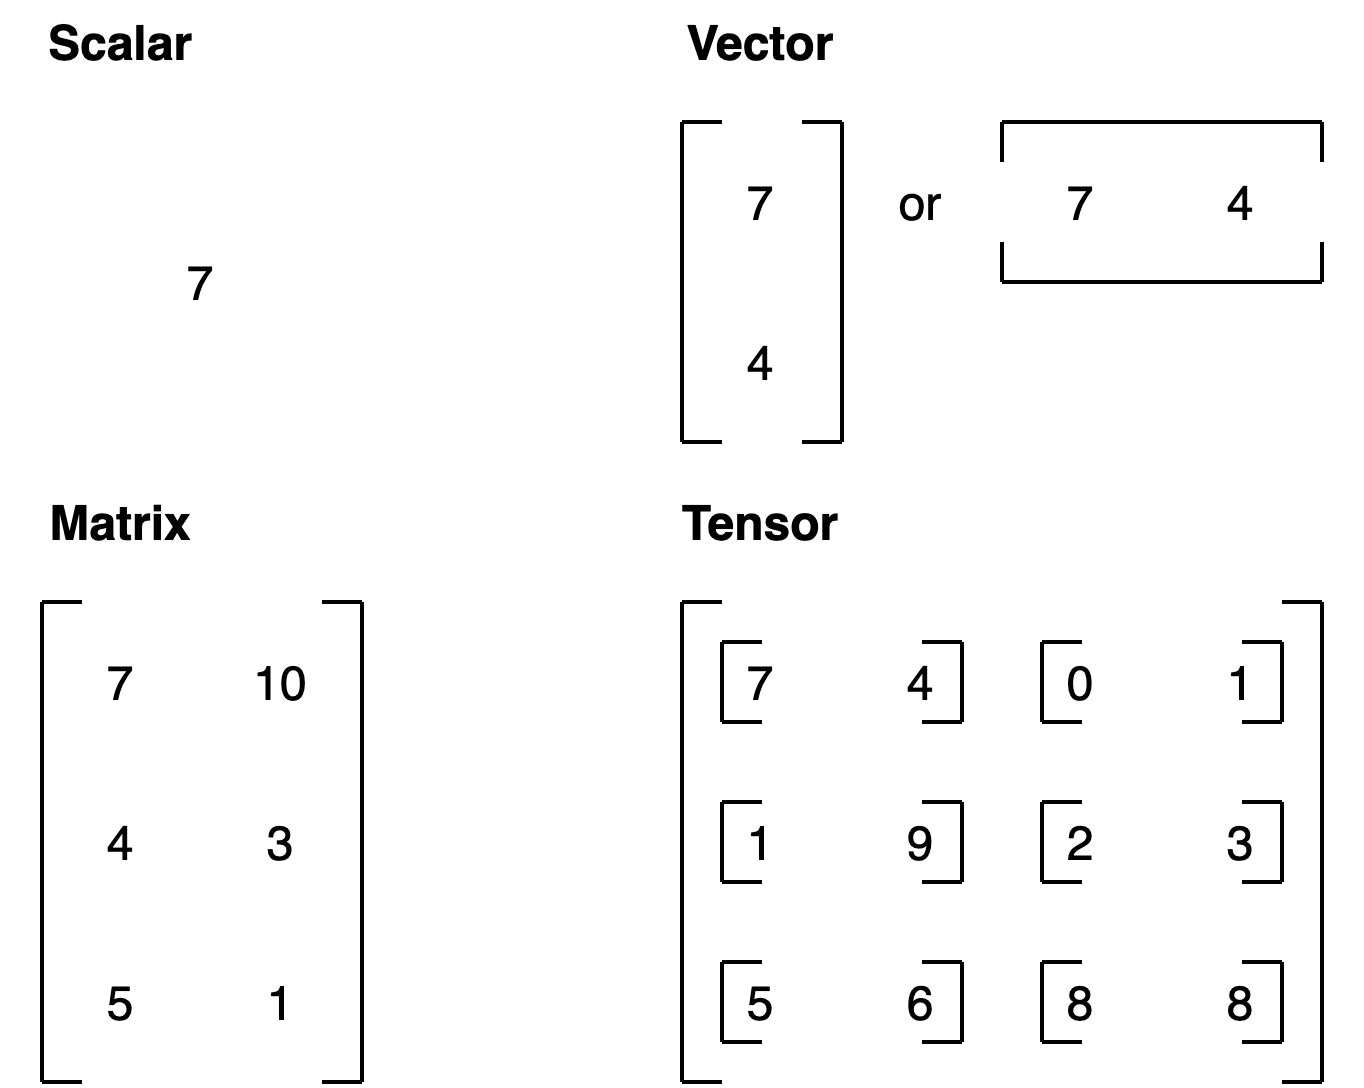

# Creating Tensors with tf.Variable()
You can also (although you likely rarely will, because often, when working with data, tensors are created for you automatically) create tensors using tf.Variable().

The difference between tf.Variable() and tf.constant() is tensors created with tf.constant() are immutable (can't be changed, can only be used to create a new tensor), where as, tensors created with tf.Variable() are mutable (can be changed).

In [63]:
# Create the same tensor with tf.Variable() and tf.constant()
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)


Now let's try to change one of the elements of the changeable tensor.

In [64]:
# Will error (requires the .assign() method)
changeable_tensor[0] = 7
changeable_tensor

TypeError: ignored


To change an element of a tf.Variable() tensor requires the assign() method.

In [65]:
# Won't error
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>


Now let's try to change a value in a tf.constant() tensor.

In [66]:
# Will error (can't change tf.constant())
unchangeable_tensor[0].assign(7)
unchangleable_tensor

AttributeError: ignored

Which one should you use? tf.constant() or tf.Variable()?

It will depend on what your problem requires. However, most of the time, TensorFlow will automatically choose for you (when loading data or modelling data).


# Creating random tensors